In [ ]:
import matplotlib
#matplotlib.use('GtkAgg')
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import sys
from multiprocessing import Pool
import copy
from math import ceil
import numpy as np
import pickle

sys.path.append('../src')
import util

def load_pickle(datapath):
    data_file = open(datapath, 'rb')
    data = pickle.load(data_file)
    data_file.close()
    
    return data
    
    """ 
    data was saved as: 
    [
        np.mean(executionRewardsActions, 0),
        np.mean(executionRewardsLtD, 0),
        np.mean(p_best_lta, 0),
        np.mean(p_best_ltd, 0),
        np.mean(cumulative_rewards_lta, 0),
        np.mean(cumulative_rewards_ltd, 0),
        np.mean(times_best_lta, 0),
        np.mean(times_best_ltd, 0),
    ]
    """
    
    

def tau(datapath):
    data = load_pickle(datapath)
    rwd_lta, rwd_ltd, pbest_lta, pbest_ltd, cmrwd_lta, cmrwd_ltd, tbest_lta, tbest_ltd, tau_rwd = data
    
    return util.meeting_point(pbest_lta, pbest_ltd)
    
    

def plot(lta_data, ltd_data, ylabel, ltd_name, figpath, figsuffix):
    plt.figure()
    plt.plot(lta_data,label="LtA")
    plt.plot(ltd_data,label=ltd_name)
    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()  #it does not work
    plt.savefig(os.path.join(figpath, '%s_%s.pdf' % (ltd_name.lower(), figsuffix))) #it works
    plt.close()
    
    
def plot_all(datapath, ltd_name, figpath):
    data = load_pickle(datapath)
    rwd_lta, rwd_ltd, mean_pbest_lta, mean_pbest_ltd, cmrwd_lta, cmrwd_ltd, tbest_lta, tbest_ltd, meeting_point = data

    plot(rwd_lta, rwd_ltd, 'Reward', ltd_name, figpath, 'reward')
    plot(mean_pbest_lta, mean_pbest_ltd, 'Prob. of best action', ltd_name, figpath, 'pbest')
    plot(cmrwd_lta, cmrwd_ltd, 'Cumulative reward', ltd_name, figpath, 'cmreward')
    plot(tbest_lta, tbest_ltd, 'Cumulative #selections of best action', ltd_name, figpath, 'tbest')
    
    print('Tau_r = %d' % meeting_point)
    
'''
def plot_pbest(datapath, ltd_name, figpath):
    
    mean_rewards_lta, mean_rewards_ltd, mean_pbest_lta, mean_pbest_ltd, cmrwd_lta, cmrwd_ltd, tbest_lta, tbest_ltd, meeting_point = load_pickle(datapath)

    plt.figure()
    plt.plot(mean_rewards_lta,label="LtA")
    plt.plot(mean_rewards_ltd,label=ltd_name)
    plt.xlabel("Iteration")
    plt.ylabel("Reward")
    plt.legend()
    plt.show()  #it does not work
    plt.savefig(os.path.join(figpath, 'rewards_%s.pdf' % ltd_name)) #it works
    plt.close()
'''   

pass


100/10/0.20


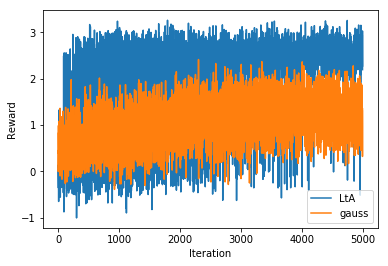

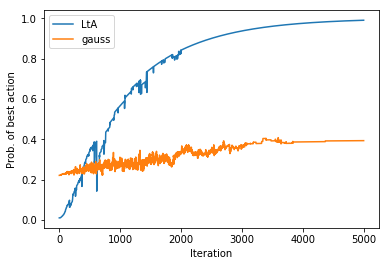

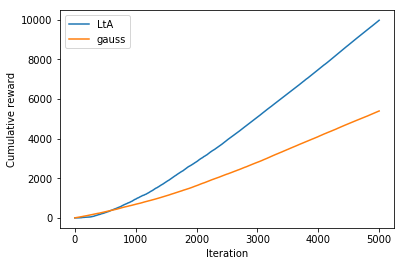

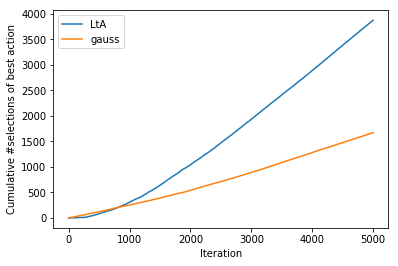

Tau_r = 233
100/25/0.20


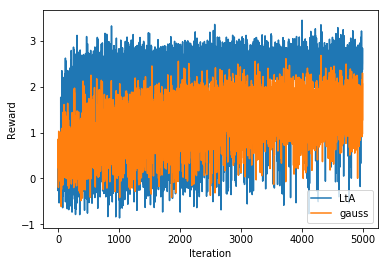

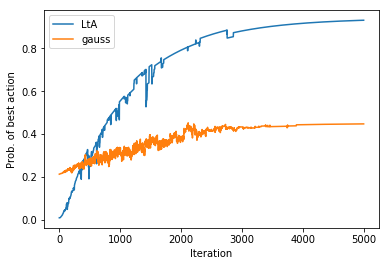

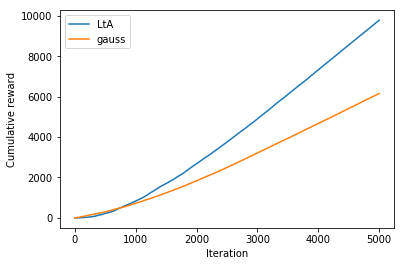

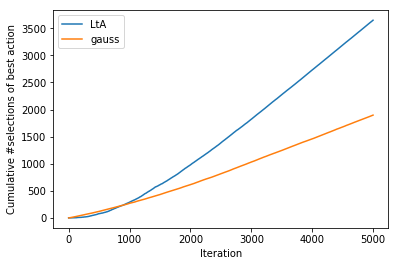

Tau_r = 263
100/50/0.20


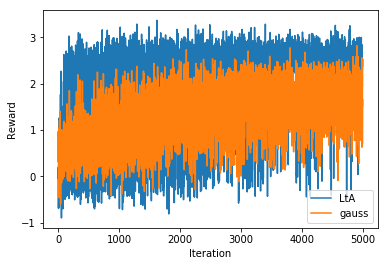

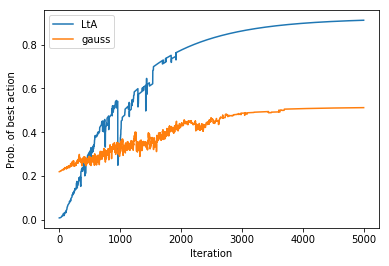

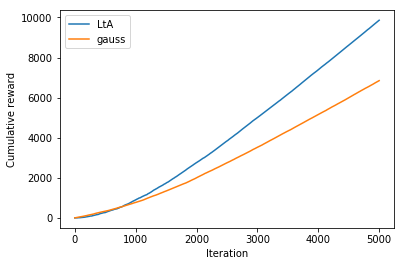

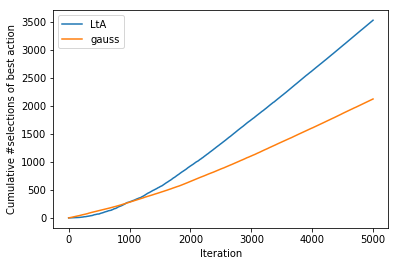

Tau_r = 309
500/10/0.20


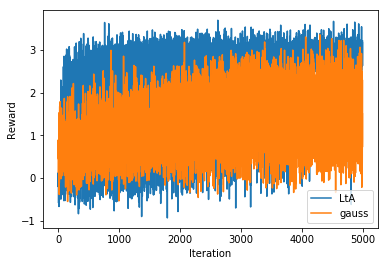

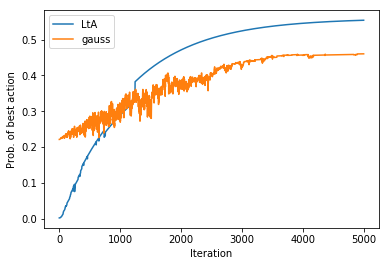

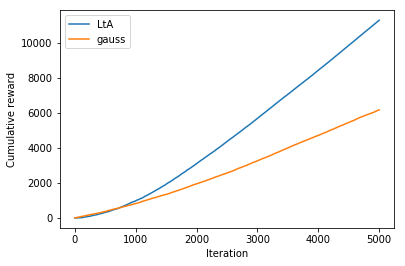

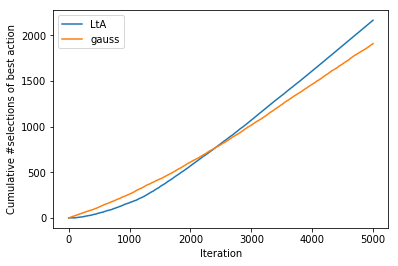

Tau_r = 204
500/25/0.20


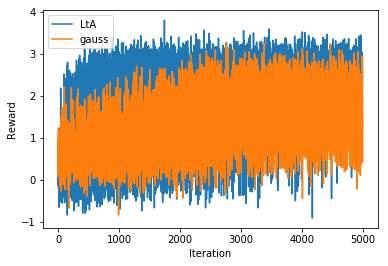

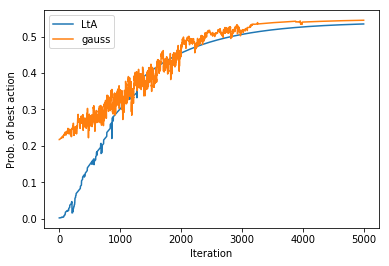

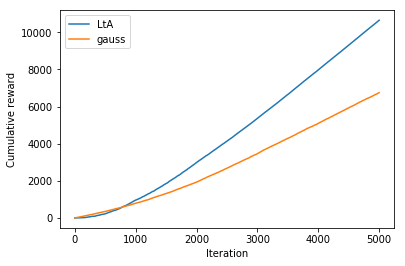

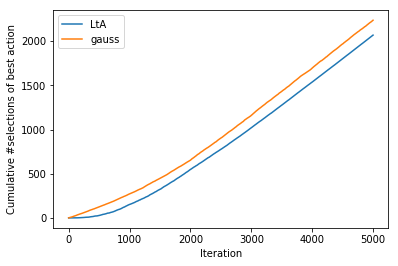

Tau_r = 319
500/50/0.20


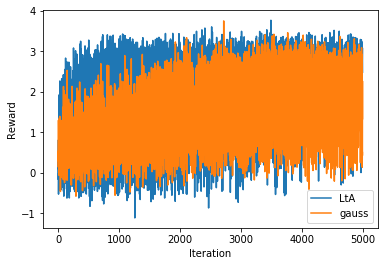

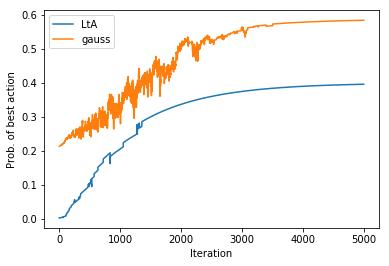

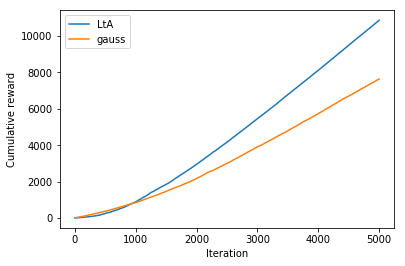

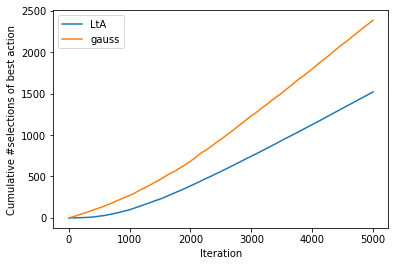

Tau_r = 356


In [26]:
for bandit_size in [100, 500]:
    for team_size in [10,25,50]:
        for mu in [0.2]:
            exp_path = '%d/%d/%.2f' % (bandit_size, team_size, mu)
            
            path = '/tmp/results_fgtau_const_e/%s/results.pickle' % exp_path
            
            print(exp_path)
        
            plot_all(path, 'gauss', '/tmp')

In [ ]:
for bandit_size in [100, 500]:
    for team_size in [10,25,50]:
        for u in [.2]:
            exp_path = '%d/%d/%.2f' % (bandit_size, team_size, u)
            
            path = '/tmp/results_futau_decay_e/%s/results.pickle' % exp_path
            
            #if not os.path.exists('path'):
            #    continue
            
            print('------%s-------' % exp_path)
        
            plot_all(path, 'uniform', '/tmp')

In [25]:
#tau for uniform
for bandit_size in [100, 500]:
    for team_size in [10,25,50]:
        for u in [.2]:
            exp_path = '%d/%d/%.2f' % (bandit_size, team_size, u)
            path = '/tmp/results_futau_decay_e/%s/results.pickle' % exp_path
            
            if not os.path.exists(path):
                continue
            
            print(exp_path, tau(path))

100/10/0.20 154
100/25/0.20 165
100/50/0.20 191
500/10/0.20 406
500/25/0.20 309
500/50/0.20 340


In [ ]:
#tau for gaussian
for bandit_size in [100, 200, 300]:
    for team_size in [10,20,30]:
        for u in [0.2, .4, .6]:
            exp_path = '%d/%d/%.2f' % (bandit_size, team_size, u)
            path = '/tmp/results_gaussian_const_e-a/%s/results.pickle' % exp_path
            
            if not os.path.exists(path):
                continue
            
            print(exp_path, tau(path))

In [ ]:
#plot_pbest(, 'Gaussian', '/tmp/')
data = load_pickle('results_gaussian/100/10/0.20/results.pickle')
rwd_lta, rwd_ltd, mean_pbest_lta, mean_pbest_ltd, cmrwd_lta, cmrwd_ltd, tbest_lta, tbest_ltd, meeting_point = data

plot(rwd_lta, rwd_ltd, 'Cumulative reward', 'LtD-gaussian', '/tmp')
plot(mean_pbest_ltd, cmrwd_ltd, 'Prob. of best action', 'LtD-gaussian', '/tmp')
